In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features].values

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

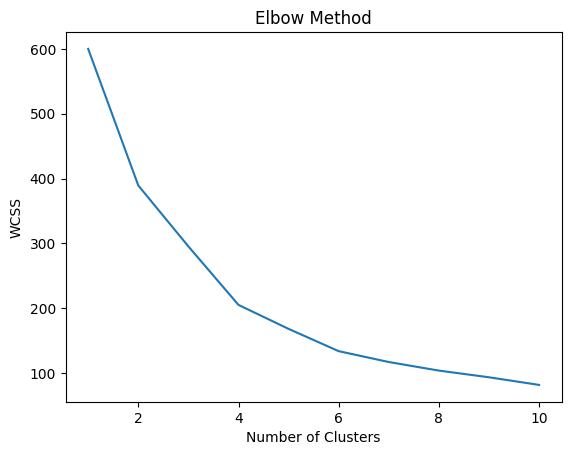

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
data['Cluster'] = clusters

cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0        161.951220  32.853659           87.341463               79.975610
1         99.750000  50.406250           60.468750               33.343750
2         61.650794  25.142857           43.269841               56.507937


<ipython-input-17-8b68ce333cde>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


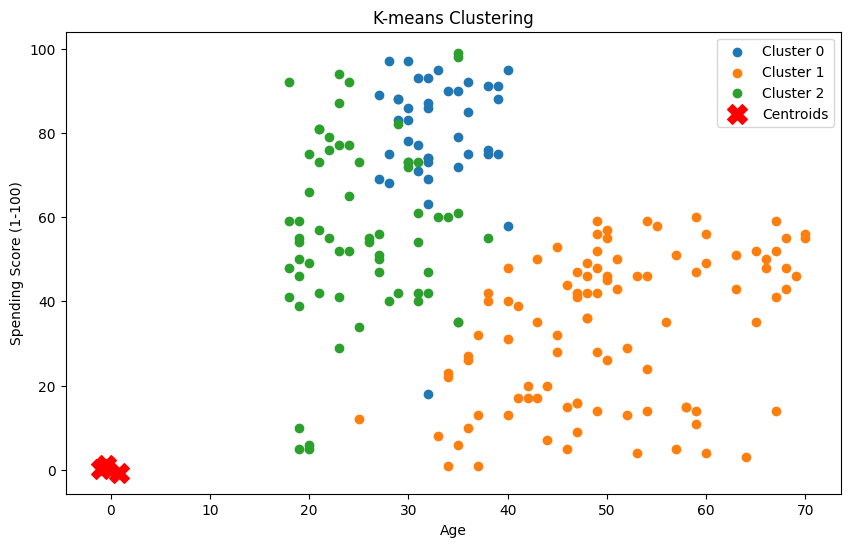

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()